<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/9_2_Converting_Raw_Text_into_Sequence_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [2]:
import collections
import random
import re
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
d2l.DATA_URL??

In [ ]:
d2l.DATA_URL

'http://d2l-data.s3-accelerate.amazonaws.com/'

In [ ]:
d2l.download

In [3]:
class Hello(d2l.Module):

  def hi(self):
    print(self.root)

In [ ]:
a = Hello()
a.hi()

AttributeError: ignored

In [4]:
class TimeMachine(d2l.DataModule):

  def _download(self):
    fname = d2l.download(d2l.DATA_URL + 'timemachine.txt', self.root,
                         '090b5e7e70c295757f55df93cb0a180b9691891a')
    # print(fname)
    with open(fname) as f:
      return f.read()
    

In [34]:
TimeMachine()._download()

'The Time Machine, by H. G. Wells [1898]\n\n\n\n\nI\n\n\nThe Time Traveller (for so it will be convenient to speak of him)\nwas expounding a recondite matter to us. His grey eyes shone and\ntwinkled, and his usually pale face was flushed and animated. The\nfire burned brightly, and the soft radiance of the incandescent\nlights in the lilies of silver caught the bubbles that flashed and\npassed in our glasses. Our chairs, being his patents, embraced and\ncaressed us rather than submitted to be sat upon, and there was that\nluxurious after-dinner atmosphere when thought roams gracefully\nfree of the trammels of precision. And he put it to us in this\nway--marking the points with a lean forefinger--as we sat and lazily\nadmired his earnestness over this new paradox (as we thought it)\nand his fecundity.\n\n\'You must follow me carefully. I shall have to controvert one or two\nideas that are almost universally accepted. The geometry, for\ninstance, they taught you at school is founded on a

In [52]:
data = TimeMachine()
raw_text = data._download()

In [36]:
raw_text

'The Time Machine, by H. G. Wells [1898]\n\n\n\n\nI\n\n\nThe Time Traveller (for so it will be convenient to speak of him)\nwas expounding a recondite matter to us. His grey eyes shone and\ntwinkled, and his usually pale face was flushed and animated. The\nfire burned brightly, and the soft radiance of the incandescent\nlights in the lilies of silver caught the bubbles that flashed and\npassed in our glasses. Our chairs, being his patents, embraced and\ncaressed us rather than submitted to be sat upon, and there was that\nluxurious after-dinner atmosphere when thought roams gracefully\nfree of the trammels of precision. And he put it to us in this\nway--marking the points with a lean forefinger--as we sat and lazily\nadmired his earnestness over this new paradox (as we thought it)\nand his fecundity.\n\n\'You must follow me carefully. I shall have to controvert one or two\nideas that are almost universally accepted. The geometry, for\ninstance, they taught you at school is founded on a

In [ ]:
raw_text[:200]

'The Time Machine, by H. G. Wells [1898]\n\n\n\n\nI\n\n\nThe Time Traveller (for so it will be convenient to speak of him)\nwas expounding a recondite matter to us. His grey eyes shone and\ntwinkled, and his usu'

### trying another way

In [5]:
import requests

In [5]:
requests.get??

In [ ]:
url = 'https://www.gutenberg.org/files/35/35-0.txt'
r = requests.get(url, allow_redirects=True)

open('facebook.ico', 'wb').write(r.content)

204357

In [6]:
url = 'https://www.gutenberg.org/files/35/35-0.txt'
r = requests.get(url, allow_redirects=True)

In [ ]:
r.content

In [ ]:
r = requests.get(url, allow_redirects=True)

In [ ]:
print(r.headers.get('content-type'))

text/plain


In [ ]:
r.headers.get??

In [ ]:
content_len = header.get('content-length', None)

### Back to normal

In [6]:
import sys
import os

In [17]:
os.getcwd()

'/content'

In [19]:
os.makedirs??

In [20]:
os.mkdir('/content/hello')

In [21]:
os.makedirs('/content/hello')

FileExistsError: ignored

In [23]:
os.makedirs('/content/hello', exist_ok=True)

In [24]:
requests.get??

In [7]:
def download(url, folder='/content/data'):
  os.makedirs(folder, exist_ok=True)
  fname = os.path.join(folder, url.split('/')[-1])
  r = requests.get(url, stream=True, verify=True)
  with open(fname, 'wb') as f:
     # write in binary format
     f.write(r.content)

  with open(fname) as f:
    return f.read()

In [9]:
url = 'https://www.gutenberg.org/files/35/35-0.txt'
dat = download(url)

In [10]:
dat

'\ufeffThe Project Gutenberg eBook of The Time Machine, by H. G. Wells\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: The Time Machine\n\nAuthor: H. G. Wells\n\nRelease Date: July, 1992 [eBook #35]\n[Most recently updated: October 22, 2020]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\n\n\n\n\nThe Time Machine\n\nAn Invention\n\nby H. G. Wells\n\n\nCONTENTS\n\n I Introduction\n II The Machine\n III The Time Traveller Returns\n IV Time Travelling\n V In the Golden Age\n VI The Sunset of Mankind\n VII A Su

In [11]:
text = re.sub('[^A-Za-z]+', ' ', dat).lower()

In [12]:
text

' the project gutenberg ebook of the time machine by h g wells this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title the time machine author h g wells release date july ebook most recently updated october language english character set encoding utf start of the project gutenberg ebook the time machine the time machine an invention by h g wells contents i introduction ii the machine iii the time traveller returns iv time travelling v in the golden age vi the sunset of mankind vii a sudden shock viii explanation ix the morlocks x when night came xi the palace of green porcelain xii in the darkness xiii th

In [38]:
print(r'\n')

\n


In [37]:
re.sub??

In [8]:
@d2l.add_to_class(TimeMachine)
def _preprocess(self, text):
  return re.sub('[^A-Za-z]+', ' ', text).lower()

In [96]:
text = data._preprocess(raw_text)
print(text)

the time machine by h g wells i the time traveller for so it will be convenient to speak of him was expounding a recondite matter to us his grey eyes shone and twinkled and his usually pale face was flushed and animated the fire burned brightly and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses our chairs being his patents embraced and caressed us rather than submitted to be sat upon and there was that luxurious after dinner atmosphere when thought roams gracefully free of the trammels of precision and he put it to us in this way marking the points with a lean forefinger as we sat and lazily admired his earnestness over this new paradox as we thought it and his fecundity you must follow me carefully i shall have to controvert one or two ideas that are almost universally accepted the geometry for instance they taught you at school is founded on a misconception is not that rather a large thing to expect us to

In [41]:
a = 'hello'
print(a)
b = list(a)
print(b)

hello
['h', 'e', 'l', 'l', 'o']


In [9]:
@d2l.add_to_class(TimeMachine)
def _tokenize(self, text):
  return list(text)

In [44]:
list1 = ['g', 'e', 'e', 'k', 's']
print("".join(list1))

geeks


In [47]:
string1 = 'ar , jf '
print(list(string1))

['a', 'r', ' ', ',', ' ', 'j', 'f', ' ']


In [56]:
tokens = data._tokenize(text)
print(len(tokens))

173428


In [46]:
','.join(tokens[:30])

't,h,e, ,t,i,m,e, ,m,a,c,h,i,n,e, ,b,y, ,h, ,g, ,w,e,l,l,s, '

In [10]:
# the "@property" decorator : Allows us to define methods that can be accessed like an attribute
class Student():

  def __init__(self, first_name):
    self.first_name = first_name
  
  @property
  def get_name(self):
    return self.first_name

In [16]:
std = Student("Monica")
print(std.first_name)

Monica


In [50]:
print(std.get_name)

Monica


In [53]:
isinstance(std, Student)

True

In [52]:
x = isinstance(5, int)
print(x)

True


In [44]:
isinstance(5, (list, tuple, int, float, str, set, frozenset, dict))

True

In [55]:
a = []
if a:
  print("a is not an empty list")
else:
  print("a is an empty list")

a is an empty list


In [56]:
a = [[0, 1], 1, 2]
isinstance(a[0], list)

True

In [57]:
isinstance(a[1], list)

False

In [17]:
a = [[0, 1], [2, 3]]
# need to unpack a
b = [num for sublist in a for num in sublist]
print(b)

[0, 1, 2, 3]


In [63]:
collections.Counter??

In [64]:
sorted??

In [18]:
a = [5, 7, 1, 3]
sorted(a)

[1, 3, 5, 7]

In [19]:
sorted(a, reverse=True)

[7, 5, 3, 1]

In [20]:
x = {'q':1, 'w':2, 'e':3, 'r':4, 't':5, 'y':6}
print(x)

{'q': 1, 'w': 2, 'e': 3, 'r': 4, 't': 5, 'y': 6}


In [21]:
sorted(x) # sorted based on ascii translations

['e', 'q', 'r', 't', 'w', 'y']

In [30]:
a = {'b':2, 'c':1}

In [31]:
a.items()

dict_items([('b', 2), ('c', 1)])

In [32]:
sorted(a.items(), key=lambda x: x[1])

[('c', 1), ('b', 2)]

In [36]:
list(sorted(set([5, 7, 8, 2, 1, 8, 7])))

[1, 2, 5, 7, 8]

In [41]:
a = [1, 2, 3]
b = [1, 2, 3]
print(a+b) # list gets concatenated

[1, 2, 3, 1, 2, 3]


In [37]:
sorted??

In [38]:
a = ['aa', 'bb' ,'cc']
b = set(['hello'] + a)

In [40]:
a + ['hello']

['aa', 'bb', 'cc', 'hello']

In [39]:
b

{'aa', 'bb', 'cc', 'hello'}

In [43]:
a = {'b':4, 'c':7}
print(a)
print(len(a))

{'b': 4, 'c': 7}
2


In [45]:
a.get('c')

7

In [47]:
a.get??

In [11]:
class Vocab():

  def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
    
    # flatten a 2D list if needed
    if tokens and isinstance(tokens[0], list):
      tokens = [token for line in tokens for token in line]

    # count token frequencies
    counter = collections.Counter(tokens)
    self.token_freqs = sorted(counter.items(), key=lambda x:x[1], reverse=True)

    # list of uniqe tokens
    self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [token for token, freq in self.token_freqs if freq >= min_freq])))
    self.token_to_idx = {token:idx for idx, token in enumerate(self.idx_to_token)}

  def __len__(self):
    return len(self.idx_to_token)

  def __getitem__(self, tokens):
    if not isinstance(tokens, (list, tuple)):
      return self.token_to_idx.get(tokens, self.unk)
    return [self.__getitem__(token) for token in tokens]

  def to_tokens(self, indices):
    if hasattr(indices, '__len__') and len(indices) > 1:
      return [self.idx_to_token[int(index)] for index in indices]
    return self.idx_to_token[indices]
  
  @property
  def unk(self):
    return self.token_to_idx['<unk>']

In [57]:
len(tokens)

173428

In [65]:
tokens[:10]

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']

In [78]:
vocab = Vocab(tokens)

In [87]:
vocab

In [79]:
vocab['i']

10

In [80]:
vocab.idx_to_token

[' ',
 '<unk>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [81]:
len(vocab)

28

In [82]:
vocab.token_to_idx

{' ': 0,
 '<unk>': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27}

In [85]:
vocab.token_freqs

[(' ', 32775),
 ('e', 17838),
 ('t', 13515),
 ('a', 11704),
 ('i', 10138),
 ('n', 9917),
 ('o', 9758),
 ('s', 8486),
 ('h', 8257),
 ('r', 7674),
 ('d', 6337),
 ('l', 6146),
 ('m', 4043),
 ('u', 3805),
 ('c', 3424),
 ('f', 3354),
 ('w', 3225),
 ('g', 3075),
 ('y', 2679),
 ('p', 2427),
 ('b', 1897),
 ('v', 1295),
 ('k', 1087),
 ('x', 236),
 ('z', 144),
 ('j', 97),
 ('q', 95)]

In [83]:
tokens[:10]

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']

In [84]:
indices = vocab[tokens[:10]]
print(indices)

[21, 9, 6, 0, 21, 10, 14, 6, 0, 14]


In [86]:
print('words : ', vocab.to_tokens(indices))

words :  ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']


In [12]:
@d2l.add_to_class(TimeMachine)
def build(self, raw_text, vocab=None):
  tokens = self._tokenize(self._preprocess(raw_text))
  if vocab is None:
    vocab = Vocab(tokens)
  corpus = [vocab[token] for token in tokens]
  return corpus, vocab

In [89]:
corpus, vocab = data.build(raw_text)

In [92]:
len(raw_text)

178979

In [91]:
len(corpus) # same as the length of tokens in raw_text

173428

In [93]:
vocab

In [94]:
len(vocab)

28

In [97]:
text

'the time machine by h g wells i the time traveller for so it will be convenient to speak of him was expounding a recondite matter to us his grey eyes shone and twinkled and his usually pale face was flushed and animated the fire burned brightly and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses our chairs being his patents embraced and caressed us rather than submitted to be sat upon and there was that luxurious after dinner atmosphere when thought roams gracefully free of the trammels of precision and he put it to us in this way marking the points with a lean forefinger as we sat and lazily admired his earnestness over this new paradox as we thought it and his fecundity you must follow me carefully i shall have to controvert one or two ideas that are almost universally accepted the geometry for instance they taught you at school is founded on a misconception is not that rather a large thing to expect us t

In [99]:
str.split??

In [100]:
a = "Hi my name is ishu"
print(a)

Hi my name is ishu


In [101]:
a.split()

['Hi', 'my', 'name', 'is', 'ishu']

In [111]:
words = text.split() # split according to white spaces
print(f"len(words) = {len(words)}")
vocab = Vocab(words)

len(words) = 32775


In [103]:
len(set(words))

4579

In [105]:
vocab.token_freqs[:10] # top 10 frequently used words

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

In [106]:
d2l.plot??

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 16, 8
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

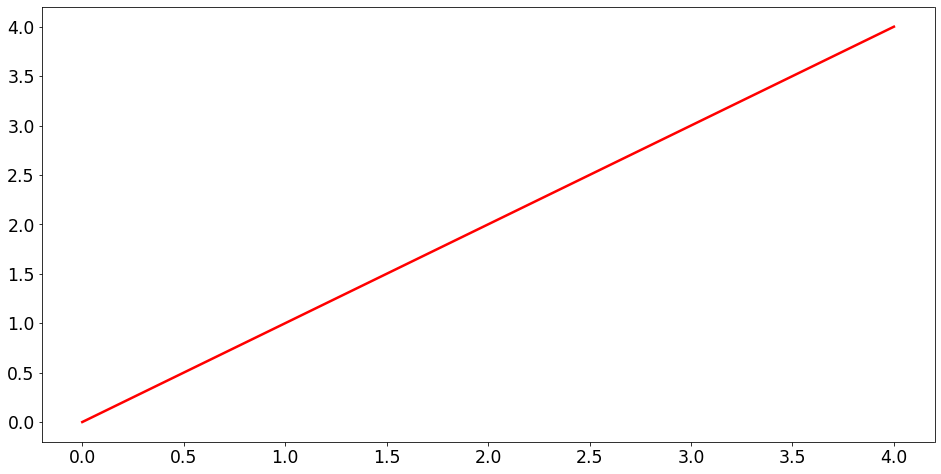

In [112]:
x = range(5)
y = range(5)
plt.plot(x, y, 'r-')

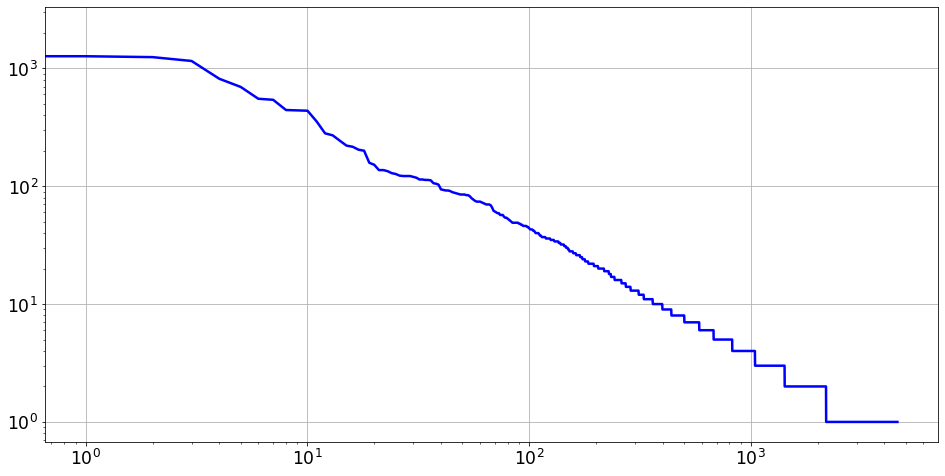

In [113]:
freqs = [freq for token, freq in vocab.token_freqs]
x = range(len(freqs))
plt.plot(x, freqs, 'b-')
plt.xscale('log')
plt.yscale('log')
plt.grid();

In [115]:
len(words)

32775

In [119]:
words[:5]

['the', 'time', 'machine', 'by', 'h']

In [117]:
a = [1, 2, 3, 4]
a[:-1]

[1, 2, 3]

In [118]:
a[1:]

[2, 3, 4]

In [121]:
a = ['hi', 'my', 'hobby', 'is', 'dancing', 'and', 'eating']
b = ['--'.join(pair) for pair in zip(a[:-1], a[1:])]
print(b)

['hi--my', 'my--hobby', 'hobby--is', 'is--dancing', 'dancing--and', 'and--eating']


In [122]:
bigram_tokens = ['--'.join(pair) for pair in zip(words[:-1], words[1:])]
# 0 and 1
# 1 and 2
# 2 and 3
# ... n-1 to n

In [123]:
bigram_vocab = Vocab(bigram_tokens)

In [124]:
bigram_vocab.token_freqs[:10]

[('of--the', 309),
 ('in--the', 169),
 ('i--had', 130),
 ('i--was', 112),
 ('and--the', 109),
 ('the--time', 102),
 ('it--was', 99),
 ('to--the', 85),
 ('as--i', 78),
 ('of--a', 73)]

In [125]:
a = ['hi', 'leh', 'ladakh', 'is', 'very', 'beautiful', 'the', 'best', 'is', 'pangong', 'lake']
print(len(a))

11


In [135]:
a = [1, 2 ,3]
a[0:2]

[1, 2]

In [139]:
trigram_tokens = ['--'.join(triple) for triple in zip(words[0:-2], words[1:-1], words[2:len(words)])]
trigram_vocab = Vocab(trigram_tokens)

In [137]:
len(trigram_vocab.token_freqs)

29882

In [138]:
trigram_vocab.token_freqs[:10]

[('the--time--traveller', 59),
 ('the--time--machine', 30),
 ('the--medical--man', 24),
 ('it--seemed--to', 16),
 ('it--was--a', 15),
 ('here--and--there', 15),
 ('seemed--to--me', 14),
 ('i--did--not', 14),
 ('i--saw--the', 13),
 ('i--began--to', 13)]

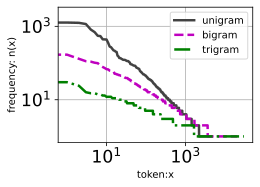

In [140]:
bigram_freq = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freq = [freq for token, freq in trigram_vocab.token_freqs]

d2l.plot([freqs, bigram_freq, trigram_freq], xlabel = "token:x", ylabel='frequency: n(x)',
         xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

## Ex 9.2:

### Q1:

vocabulary size decreases exponentially

ni inversely proportional to i^alpha

In [141]:
plt.xticks??

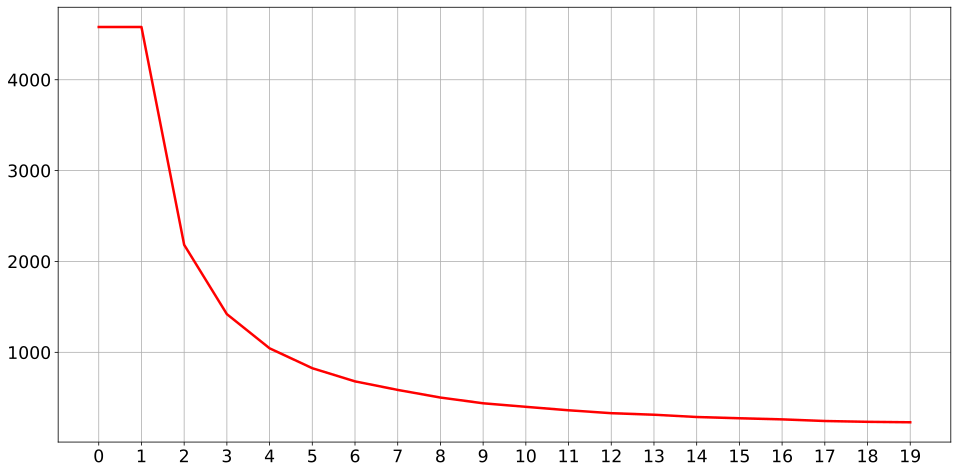

In [146]:
# we'll work with unigrams
words = text.split()

min_freq_list = range(20)
len_vocab = []
for min_freq in min_freq_list:
  vocab = Vocab(words, min_freq)
  len_vocab.append(len(vocab))

plt.xticks(x, x)
plt.plot(min_freq_list, len_vocab, 'r-')
plt.grid();

### Q2:

- bigram_alpha = 0.87
- trigram_alpha = 0.975


In [147]:
len_bigram = len(bigram_vocab)
len_trigram = len(trigram_vocab)

print(len_bigram)
print(len_trigram)

20235
29883


In [148]:
# for bigram_vocab : 
bigram_vocab.token_freqs[:2]

[('of--the', 309), ('in--the', 169)]

In [14]:
import math

In [150]:
math.log2(2)

1.0

In [151]:
n1 = bigram_vocab.token_freqs[0][1]
n2 = bigram_vocab.token_freqs[1][1]
bigram_alpha = math.log2(n1/n2)
print(bigram_alpha)

0.8705835916221902


In [152]:
# for trigram vocab : 
n1 = trigram_vocab.token_freqs[0][1]
n2 = trigram_vocab.token_freqs[1][1]
trigram_alpha = math.log2(n1/n2)
print(trigram_alpha)

0.9757524537533226


### Q3:

using the alchemist book

In [16]:
d2l.DataModule??

In [ ]:
def download(url, folder='/content/data'):
  os.makedirs(folder, exist_ok=True)
  fname = os.path.join(folder, url.split('/')[-1])
  r = requests.get(url, stream=True, verify=True)
  with open(fname, 'wb') as f:
     # write in binary format
     f.write(r.content)

  with open(fname) as f:
    return f.read()

In [17]:
os.mkdir('/content/hello/a')

FileNotFoundError: ignored

In [18]:
os.makedirs('/content/hello/a')

In [19]:
requests.get??

In [20]:
a = '/content/hello'
b = 'alchemist'
print(os.path.join(a, b))

/content/hello/alchemist


In [52]:
class Alchemist(d2l.DataModule):

  def _download(self):
    # this function just returns the raw text contained in the url
    url = 'https://www.gutenberg.org/files/43240/43240-0.txt'
    folder = '/content/alchemist'
    os.makedirs(folder, exist_ok=True)
    fname = os.path.join(folder, url.split('/')[-1])
    r = requests.get(url)
    with open(fname, 'wb') as f:
      f.write(r.content)
    with open(fname) as f:
      return f.read() 
    
  def _preprocess(self, text):
    return re.sub('[^A-Za-z]+', ' ', text).lower()

  def _tokenize(self, text):
    # used to tokenize on the characters level
    return list(text)

  def build(self, raw_text, vocab=None):
    tokens = self._tokenize(self._preprocess(raw_text))
    if vocab is None:
      vocab = Vocab(tokens)
    corpus = [vocab[token] for token in tokens]
    return corpus, vocab

In [53]:
data = Alchemist()
raw_text = data._download()

In [54]:
raw_text

'\ufeffProject Gutenberg\'s Alchemy: Ancient and Modern, by H. Stanley Redgrove\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org/license\n\n\nTitle: Alchemy: Ancient and Modern\n       Being a Brief Account of the Alchemistic Doctrines, and\n       Their Relations, to Mysticism on the One Hand, and ...\n\nAuthor: H. Stanley Redgrove\n\nRelease Date: July 17, 2013 [EBook #43240]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALCHEMY: ANCIENT AND MODERN ***\n\n\n\n\nProduced by Chris Curnow, Harry Lamé and the Online\nDistributed Proofreading Team at http://www.pgdp.net (This\nfile was produced from images generously made available\nby The Internet Archive)\n\n\n\n\n\n\n\n    Transcriber’s Notes\n\n    Texts printed in italics in the 

In [55]:
raw_text[:-60]

'\ufeffProject Gutenberg\'s Alchemy: Ancient and Modern, by H. Stanley Redgrove\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org/license\n\n\nTitle: Alchemy: Ancient and Modern\n       Being a Brief Account of the Alchemistic Doctrines, and\n       Their Relations, to Mysticism on the One Hand, and ...\n\nAuthor: H. Stanley Redgrove\n\nRelease Date: July 17, 2013 [EBook #43240]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALCHEMY: ANCIENT AND MODERN ***\n\n\n\n\nProduced by Chris Curnow, Harry Lamé and the Online\nDistributed Proofreading Team at http://www.pgdp.net (This\nfile was produced from images generously made available\nby The Internet Archive)\n\n\n\n\n\n\n\n    Transcriber’s Notes\n\n    Texts printed in italics in the 

In [56]:
text = data._preprocess(raw_text)
text

' project gutenberg s alchemy ancient and modern by h stanley redgrove this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org license title alchemy ancient and modern being a brief account of the alchemistic doctrines and their relations to mysticism on the one hand and author h stanley redgrove release date july ebook language english character set encoding utf start of this project gutenberg ebook alchemy ancient and modern produced by chris curnow harry lam and the online distributed proofreading team at http www pgdp net this file was produced from images generously made available by the internet archive transcriber s notes texts printed in italics in the original work have been transcribed as text bold face texts as text small caps texts have been transcribed as all capitals u represents a u s

In [57]:
# let's first tokenize into characters
tokens = data._tokenize(text)
print(f'len(tokens) = {len(tokens)}')
print(tokens[:15])

len(tokens) = 259472
[' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b']


In [58]:
vocab = Vocab(tokens)

In [59]:
vocab.token_freqs

[(' ', 44767),
 ('e', 27517),
 ('t', 20911),
 ('a', 16475),
 ('i', 16056),
 ('o', 15956),
 ('s', 14023),
 ('n', 13850),
 ('r', 13025),
 ('h', 12022),
 ('l', 8783),
 ('c', 7737),
 ('d', 7489),
 ('m', 6491),
 ('u', 5868),
 ('f', 5307),
 ('p', 4772),
 ('y', 3805),
 ('g', 3642),
 ('w', 3597),
 ('b', 3388),
 ('v', 2042),
 ('k', 834),
 ('x', 546),
 ('j', 282),
 ('q', 244),
 ('z', 43)]

In [60]:
vocab.idx_to_token

[' ',
 '<unk>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [61]:
corp = [vocab[token] for token in tokens]
print(len(corp))

259472


In [62]:
len(vocab)

28

In [63]:
d2l.HyperParameters??

In [64]:
corpus, vocab = data.build(raw_text)

In [65]:
print(len(corpus), len(vocab))

259472 28


In [66]:
# let's analyse using tokens as words
text[:60]

' project gutenberg s alchemy ancient and modern by h stanley'

In [67]:
words = text.split() # unigram
print(len(words))

44766


In [68]:
vocab = Vocab(words)
print(len(vocab))

5414


In [69]:
vocab.token_freqs[:10]

[('the', 3506),
 ('of', 2486),
 ('and', 1229),
 ('to', 1003),
 ('in', 941),
 ('a', 886),
 ('is', 634),
 ('that', 580),
 ('it', 421),
 ('by', 398)]

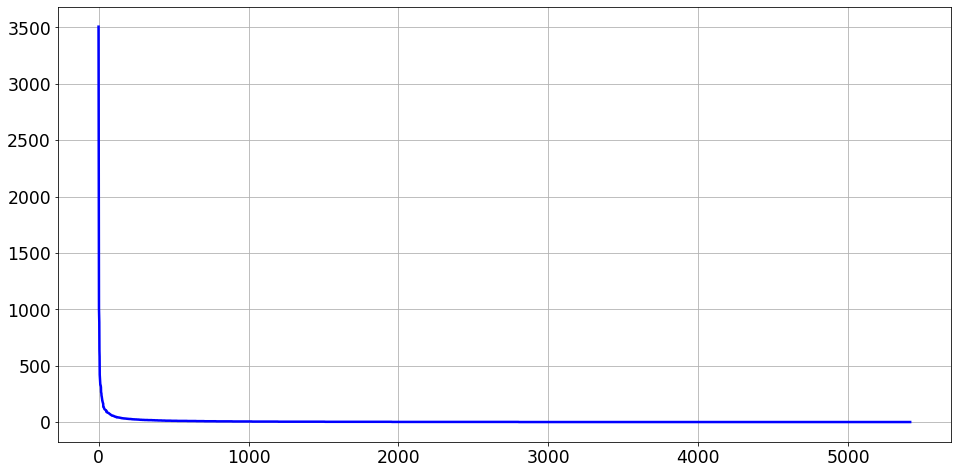

In [70]:
unigram_freqs = [freq for token, freq in vocab.token_freqs]
plt.plot(range(len(unigram_freqs)), unigram_freqs, 'b-')
plt.grid();

In [71]:
a = [1, 2, 3]
a[:-1]

[1, 2]

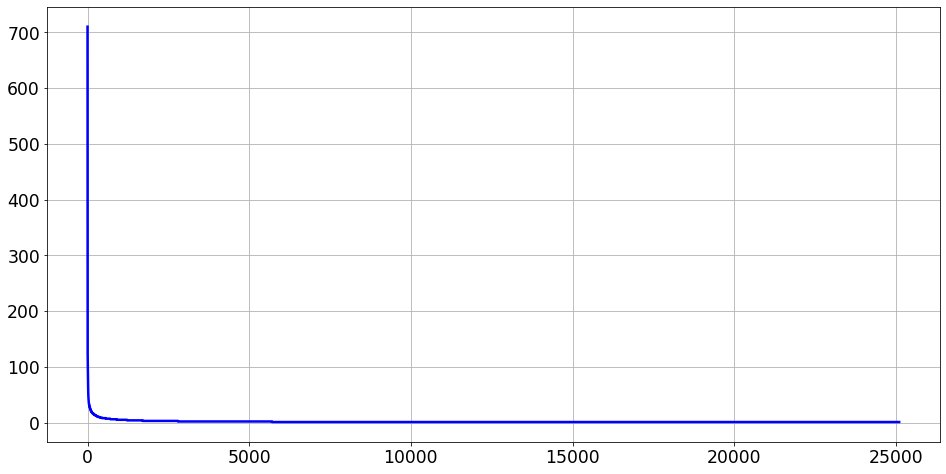

In [73]:
bigram_tokens = ['-'.join(pair) for pair in zip(words[:-1], words[1:])]
bigram_vocab = Vocab(bigram_tokens) 
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]

plt.plot(range(len(bigram_freqs)), bigram_freqs, 'b-')
plt.grid();

In [74]:
print(len(bigram_vocab))

25105


In [75]:
bigram_vocab.token_freqs[:10]

[('of-the', 710),
 ('in-the', 293),
 ('to-the', 154),
 ('that-the', 129),
 ('and-the', 125),
 ('it-is', 116),
 ('by-the', 108),
 ('of-a', 108),
 ('on-the', 97),
 ('the-alchemists', 96)]

In [76]:
trigram_tokens = ['--'.join(pair) for pair in zip(words[:-2], words[1:-1], words[2:])]
trigram_vocab = Vocab(trigram_tokens)
print(len(trigram_vocab))

37855


In [77]:
trigram_vocab.token_freqs[:10]

[('project--gutenberg--tm', 57),
 ('philosopher--s--stone', 32),
 ('of--the--alchemists', 31),
 ('the--project--gutenberg', 29),
 ('the--philosopher--s', 28),
 ('pp--et--seq', 25),
 ('sir--william--ramsay', 24),
 ('the--transmutation--of', 23),
 ('of--the--metals', 23),
 ('a--e--waite', 22)]

In [79]:
import random

In [80]:
len(trigram_vocab.token_freqs)

37854

In [81]:
random.randint??

In [89]:
trigram_dict = {token:freq for token, freq in trigram_vocab.token_freqs}

In [94]:
dict1 = {'a':1, 'b':2, 'c':4, 'd':5}
ind = ['a', 'c']

In [102]:
indices = []
for i in range(10):
  indices.append(random.randint(0, len(trigram_vocab.token_freqs)-1))
# print(indices)
my_tokens = trigram_vocab.to_tokens(indices)
my_freqs = [trigram_dict[token] for token in my_tokens] 

my_list = [(token,freq) for token, freq in zip(my_tokens, my_freqs)]
print(my_list)

[('by--a--greater', 1), ('their--substance--diminishing', 1), ('alone--the--supposition', 1), ('rare--far--dearer', 1), ('strove--to--assist', 1), ('a--difficultly--inflammable', 1), ('that--by--the', 1), ('laws--we--may', 1), ('in--concerning--the', 1), ('carbon--combining--with', 1)]


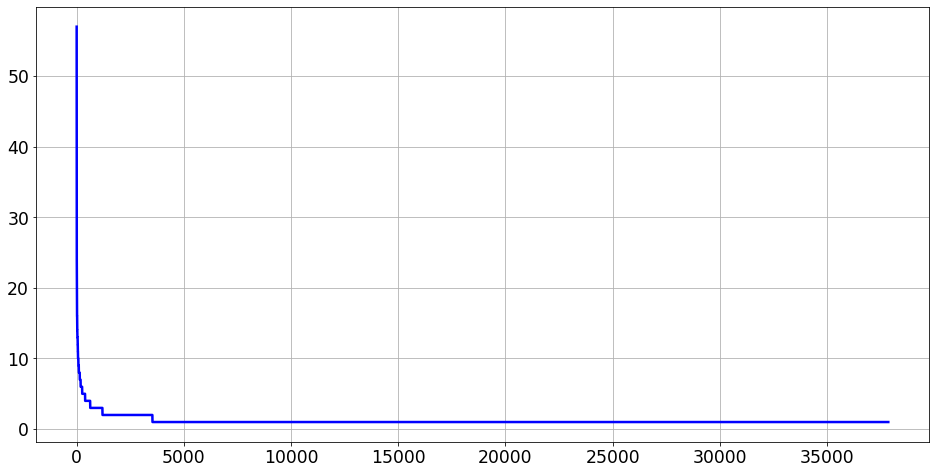

In [103]:
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs] 
plt.plot(range(len(trigram_freqs)), trigram_freqs, 'b-')
plt.grid();